In [1]:
# imports
import re
import ast
import time
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
# store path to notebook
PWD = !pwd
PWD = PWD[0]

In [4]:
# start Spark Session
from pyspark.sql import SparkSession
app_name = "hw5_notebook"
master = "local[*]"
spark = SparkSession\
        .builder\
        .appName(app_name)\
        .master(master)\
        .getOrCreate()
sc = spark.sparkContext

__`REMINDER`__: If you are running this notebook on the course docker container, you can monitor the progress of your jobs using the Spark UI at: http://localhost:4040/jobs/

In [5]:
trainRDD = sc.textFile('train.txt')
testRDD = sc.textFile('test.txt')

In [6]:
trainRDD.take(5)

Py4JJavaError: An error occurred while calling o32.partitions.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/media/notebooks/Assignments/FinalProject/train.txt
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:287)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:229)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:315)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:200)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.api.java.JavaRDDLike$class.partitions(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.AbstractJavaRDDLike.partitions(JavaRDDLike.scala:45)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


# Dataframe Explorations  (skip this part)

In [5]:
# Read data into dataframe object
from pyspark.sql import Row

# create test dataframe
lines = sc.textFile("test.txt")
parts = lines.map(lambda x: x.split("\t"))
features = parts.map(lambda x: Row(n1=x[0], n2=x[1], n3=x[2], n4=x[3], n5=x[4], n6=x[5],
                                   n7=x[6], n8=x[7], n9=x[8], n10=x[9], n11=x[10], n12=x[11],
                                   n13=x[12], c1=x[13], c2=x[14], c3=x[15], c4=x[16], c5=x[17],
                                   c6=x[18], c7=x[19], c8=x[20], c9=x[21], c10=x[22], c11=x[23],
                                   c12=x[24], c13=x[25], c14=x[26], c15=x[27], c16=x[28], c17=x[29],
                                   c18=x[30], c19=x[31], c20=x[32], c21=x[33], c22=x[34], c23=x[35],
                                   c24=x[36], c25=x[37], c26=x[38]))

testDF = spark.createDataFrame(features)
testDF.createOrReplaceTempView("features")

# create train dataframe
lines = sc.textFile("train.txt")
parts = lines.map(lambda x: x.split("\t"))
features = parts.map(lambda x: Row(y=x[0], n1=x[1], n2=x[2], n3=x[3], n4=x[4], n5=x[5],
                                   n6=x[6], n7=x[7], n8=x[8], n9=x[9], n10=x[10], n11=x[11],
                                   n12=x[12], n13=x[13], c1=x[14], c2=x[15], c3=x[16], c4=x[17],
                                   c5=x[18], c6=x[19], c7=x[20], c8=x[21], c9=x[22], c10=x[23],
                                   c11=x[24], c12=x[25], c13=x[26], c14=x[27], c15=x[28], c16=x[29],
                                   c17=x[30], c18=x[31], c19=x[32], c20=x[33], c21=x[34], c22=x[35],
                                   c23=x[36], c24=x[37], c25=x[38], c26=x[39]))

trainDF = spark.createDataFrame(features)
trainDF.createOrReplaceTempView("features")



In [12]:
# create sample DF for EDA
sampleDF = trainDF.sample(False, .0001).cache()

In [13]:
# overview of sampleDF object
display(sampleDF)
print(sampleDF['y'])
print(type(sampleDF['y']))
sampleDF.head(3)

DataFrame[c1: string, c10: string, c11: string, c12: string, c13: string, c14: string, c15: string, c16: string, c17: string, c18: string, c19: string, c2: string, c20: string, c21: string, c22: string, c23: string, c24: string, c25: string, c26: string, c3: string, c4: string, c5: string, c6: string, c7: string, c8: string, c9: string, n1: string, n10: string, n11: string, n12: string, n13: string, n2: string, n3: string, n4: string, n5: string, n6: string, n7: string, n8: string, n9: string, y: string]

[Row(c1='8cf07265', c10='6eef6fc1', c11='c3c3306c', c12='7c288f60', c13='c8e0a818', c14='b28479f6', c15='856048a0', c16='172e0308', c17='e5ba7672', c18='fba30a05', c19='21ddcdc9', c2='6496eea0', c20='b1252a9d', c21='c42c7f9e', c22='', c23='32c7478e', c24='0b95f1c5', c25='ea9a246c', c26='d4d7b05b', c3='d15f8d96', c4='8811643a', c5='4cf72387', c6='', c7='c4e08fdd', c8='0b153874', c9='a73ee510', n1='', n10='', n11='1', n12='', n13='1', n2='-1', n3='4', n4='1', n5='8100', n6='55', n7='1', n8='2', n9='55', y='1'),
 Row(c1='5bfa8ab5', c10='637e5734', c11='bba67b67', c12='', c13='849a0a56', c14='b28479f6', c15='c8ea88d9', c16='', c17='e5ba7672', c18='3cbc29b4', c19='', c2='5b7b33dc', c20='', c21='', c22='', c23='3a171ecb', c24='', c25='', c26='', c3='', c4='', c5='4cf72387', c6='7e0ccccf', c7='f784ca0f', c8='0b153874', c9='a73ee510', n1='3', n10='1', n11='1', n12='0', n13='', n2='1', n3='', n4='', n5='691', n6='3', n7='3', n8='0', n9='0', y='0'),
 Row(c1='68fd1e64', c10='de551d2f', c11='17586

In [9]:
# # count # of rows
# start = time.time()
# print(sampleDF.count())
# print(f'... completed job in {time.time() - start} seconds.')


471
... completed job in 1156.9812326431274 seconds.


In [10]:
# # count # of columns
# print('# of columns:', len(sampleDF.columns))
# print(sampleDF.columns)

# of columns: 40
['c1', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c2', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'n1', 'n10', 'n11', 'n12', 'n13', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'y']


In [11]:
# sampleDF.select('c1').show(10)

+--------+
|      c1|
+--------+
|05db9164|
|68fd1e64|
|8cf07265|
|05db9164|
|05db9164|
|68fd1e64|
|05db9164|
|05db9164|
|05db9164|
|8cf07265|
+--------+
only showing top 10 rows



In [7]:
# # try plotting column as histogram
# plt.hist(np.array(sampleDF.select('y')))
# # plt.hist(sampleDF.select('y'))

In [44]:
# # convert to pandas dataframe

# start = time.time()

# sample_pd_df = sampleDF.toPandas()

# print(f'... completed job in {time.time() - start} seconds.')

... completed job in 1.0708746910095215 seconds.


In [70]:
# print(sample_pd_df.head())
# print(type(sample_pd_df['y']))
# # sample_pd_df['y']
# print(type(sample_pd_df['y'][0]))


         c1       c10       c11       c12       c13       c14       c15  \
0  8cf07265  6eef6fc1  c3c3306c  7c288f60  c8e0a818  b28479f6  856048a0   
1  5bfa8ab5  637e5734  bba67b67            849a0a56  b28479f6  c8ea88d9   
2  68fd1e64  de551d2f  17586bd8  90a7c96d  4c9ff09f  07d13a8f  73e2709e   
3  05db9164  f26b2389  60d2afd7  036cd1cc  155ff7d9  64c94865  e8b76093   
4  05db9164  e89812b3  f173d5e6  f47544f5  ce418dc9  07d13a8f  9fa29433   

        c16       c17       c18 ... n13    n2  n3 n4     n5  n6  n7  n8   n9  \
0  172e0308  e5ba7672  fba30a05 ...   1    -1   4  1   8100  55   1   2   55   
1            e5ba7672  3cbc29b4 ...         1           691   3   3   0    0   
2  6914d49e  e5ba7672  1616f155 ...   0    -1  15  0      0   0  13  32  328   
3  4f997202  1e88c74f  03afe4f8 ...   2  1419   2  1  11448       0   8    4   
4  fc53f85c  e5ba7672  ac7705cd ...        87         77715           0        

   y  
0  1  
1  0  
2  0  
3  0  
4  0  

[5 rows x 40 columns]
<cl

In [8]:
# # plot distribution of target variable

# # count variables
# lbl, cnts = np.unique(sample_pd_df['y'], return_counts=True)
# print(list(zip(lbl, cnts)))

# data = dict(zip(lbl, cnts))
# names = list(data.keys())
# values = list(data.values())

# fig, axs = plt.subplots(1, 1, figsize=(3, 3), sharey=True)
# axs.bar(names, values)
# fig.suptitle('Response Variabe- Clicks')

In [ ]:
# # plot distributions of categorical variables
# start = time.time()

# # count variables
# cat_var = [sampleDF.columns[14:39]]
# cat_var_counts = {}

# for var in cat_vars:
#     for lbl in var:
#         cat_var_counts[lbl] = np.unique(sample_pd_df['y'], return_counts=True)    
# lbl, cnts = np.unique(sample_pd_df['y'], return_counts=True)
# print(list(zip(lbl, cnts)))




# data = dict(zip(lbl, cnts))
# names = list(data.keys())
# values = list(data.values())

# fig, axs = plt.subplots(1, 1, figsize=(3, 3), sharey=True)
# axs.bar(names, values)
# fig.suptitle('Categorical Variabes')

# print(f'... completed job in {time.time() - start} seconds.')

In [ ]:
# # plot distributions of numerical variables

# start = time.time()

# for i in sampleDF.columns[1:13]:
    
# fig, axs = plt.subplots(1, 1, figsize=(3, 3), sharey=True)
# axs.bar(names, values)
# fig.suptitle('Numerical Variabes')    
    
# print(f'... completed job in {time.time() - start} seconds.')    

# EDA #

- Count total number of observations- 6 million
- Count number of features- 13 integer, and 26 categorical (from Readme)
- Count number of unique values for each feature- TBD
- Plot histogram of target variable (first column- click or no-click) to check for unbalanced data
- Plot histograms for each feature
- Check to see if there is anything wrong with the data (missing values, outliers, etc.)


In [7]:
start = time.time()

count = testRDD.count()

print(f'Total Nodes: {count}')

print(f'... completed job in {time.time() - start} seconds.')

Total Nodes: 6042135
... completed job in 21.235108613967896 seconds.


In [8]:
start = time.time()

count = trainRDD.count()

print(f'Total Nodes: {count}')

print(f'... completed job in {time.time() - start} seconds.')



Total Nodes: 45840617
... completed job in 144.72692155838013 seconds.


In [7]:
# parsing functions

# output (y, ((continuous variables), (categorical variables)))

def parseTrain(line):
    y, i1, i2, i3, i4, i5, i6, i7, i8, i9, i10, i11, i12, i13, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22, c23, c24, c25, c26 = line.split('\t')
    return (y, i1, i2, i3, i4, i5, i6, i7, i8, i9, i10, i11, i12, i13, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22, c23, c24, c25, c26)

def parseTest(line):
    i1, i2, i3, i4, i5, i6, i7, i8, i9, i10, i11, i12, i13, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22, c23, c24, c25, c26 = line.split('\t')
    return (i1, i2, i3, i4, i5, i6, i7, i8, i9, i10, i11, i12, i13, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22, c23, c24, c25, c26)


parsedTrainRDD = trainRDD.map(parseTrain)
parsedTestRDD = testRDD.map(parseTest)

# parsedTestRDD.take(1)
# parsedTrainRDD.take(1)

In [8]:
sampleTrainRDD = sc.parallelize(parsedTrainRDD.take(1000))

In [9]:
# create column array for target variable

start = time.time()

y_column = np.array(sampleTrainRDD.map(lambda x: int(x[0])).collect())
    
print(f'... completed job in {time.time() - start} seconds.')

... completed job in 0.22697114944458008 seconds.


[(0, 795), (1, 205)]


Text(0.5,0.98,'Response Variabe- Clicks')

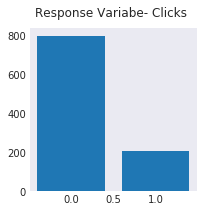

In [10]:
# plot distribution of target variable

# count variables
lbl, cnts = np.unique(y_column, return_counts=True)
print(list(zip(lbl, cnts)))

data = dict(zip(lbl, cnts))
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 1, figsize=(3, 3))
axs.bar(names, values)
fig.suptitle('Response Variabe- Clicks')

In [33]:
# create column arrays for categorical features
start = time.time()

categorical_column_names = ['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10',
                            'c11','c12','c13','c14','c15','c16','c17','c18',
                            'c19','c20','c21','c22','c23','c24','c25','c26']
categorical_columns = defaultdict()

for i in range(14,40):
    categorical_columns[categorical_column_names[i-14]] = np.array(sampleTrainRDD.map(lambda x: x[i]).collect())
    
print(f'... completed job in {time.time() - start} seconds.')

... completed job in 2.673924446105957 seconds.


In [36]:
print(len(categorical_columns['c1']))
print(categorical_columns['c1'][:30])
print(len(categorical_columns['c26']))
print(categorical_columns['c26'][:30])

1000
['68fd1e64' '68fd1e64' '287e684f' '68fd1e64' '8cf07265' '05db9164'
 '439a44a4' '68fd1e64' '05db9164' '05db9164' '05db9164' '05db9164'
 '241546e0' 'be589b51' '5a9ed9b0' '05db9164' '68fd1e64' '8cf07265'
 '05db9164' '3c9d8785' '1464facd' '05db9164' '05db9164' '05db9164'
 '5a9ed9b0' '5a9ed9b0' '8cf07265' '68fd1e64' '68fd1e64' '05db9164']
1000
['9727dd16' '731c3655' '' '' '' '' '' '' '' '' '9a556cfc' '' '' '8967c0d2'
 'c43c3f58' '' 'aa5f0a15' '' '9593bba9' '' '' 'af7ece63' '' '' ''
 '49d68486' 'cdfe5ab7' '' '' '']


... completed job in 1.6300609111785889 seconds.


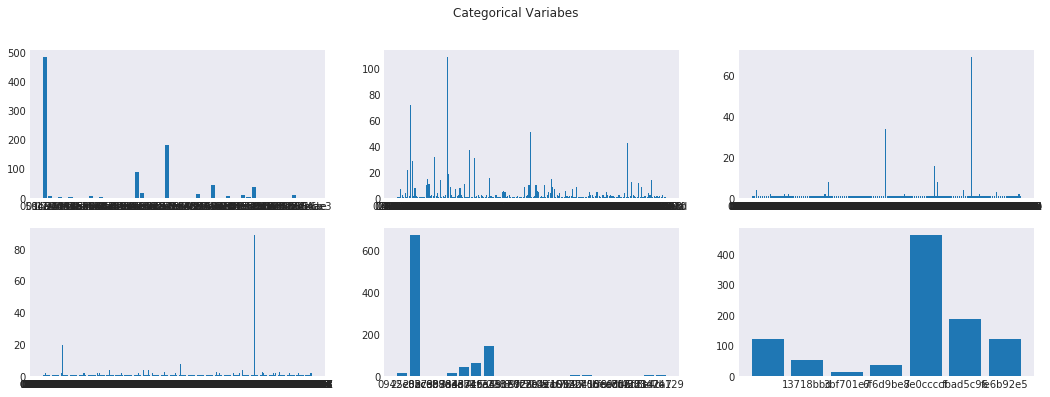

In [37]:
# plot distribution of categorical variable
start = time.time()
names = []
values = []

# count variables
for i in range(6):
    lbl, cnts = np.unique(categorical_columns[categorical_column_names[i]], return_counts=True)
    data = dict((zip(lbl, cnts)))
    names.append(list(data.keys()))
    values.append(list(data.values()))
#     print(names, values)
    
fig, axs = plt.subplots(2, 3, figsize=(18, 6), sharey=False)

axs[0,0].bar(names[0], values[0])
axs[0,1].bar(names[1], values[1])
axs[0,2].bar(names[2], values[2])
axs[1,0].bar(names[3], values[3])
axs[1,1].bar(names[4], values[4])
axs[1,2].bar(names[5], values[5])

fig.suptitle('Categorical Variabes')
print(f'... completed job in {time.time() - start} seconds.')

... completed job in 2.791206121444702 seconds.


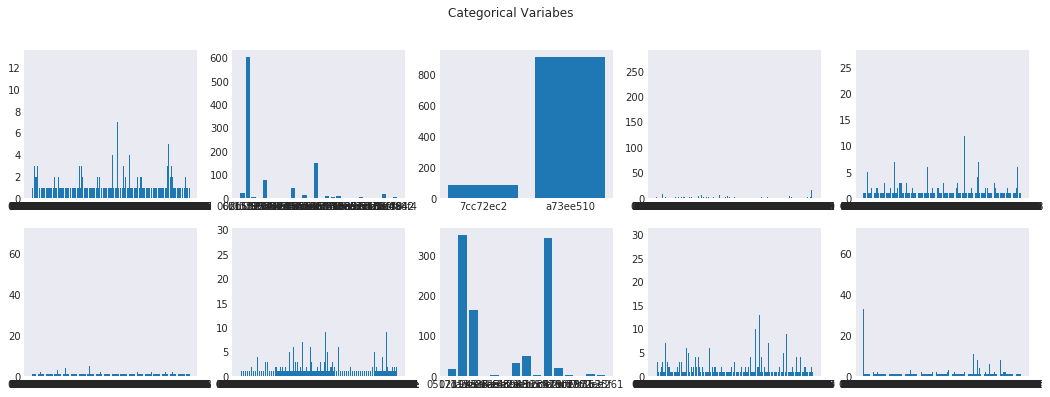

In [38]:
start = time.time()
names = []
values = []

# count variables
for i in range(10):
    lbl, cnts = np.unique(categorical_columns[categorical_column_names[i+6]], return_counts=True)
    data = dict((zip(lbl, cnts)))
    names.append(list(data.keys()))
    values.append(list(data.values()))
#     print(names, values)
    
fig, axs = plt.subplots(2, 5, figsize=(18, 6), sharey=False)

axs[0,0].bar(names[0], values[0])
axs[0,1].bar(names[1], values[1])
axs[0,2].bar(names[2], values[2])
axs[0,3].bar(names[3], values[3])
axs[0,4].bar(names[4], values[4])
axs[1,0].bar(names[5], values[5])
axs[1,1].bar(names[6], values[6])
axs[1,2].bar(names[7], values[7])
axs[1,3].bar(names[8], values[8])
axs[1,4].bar(names[9], values[9])

fig.suptitle('Categorical Variabes')
print(f'... completed job in {time.time() - start} seconds.')

... completed job in 1.361966609954834 seconds.


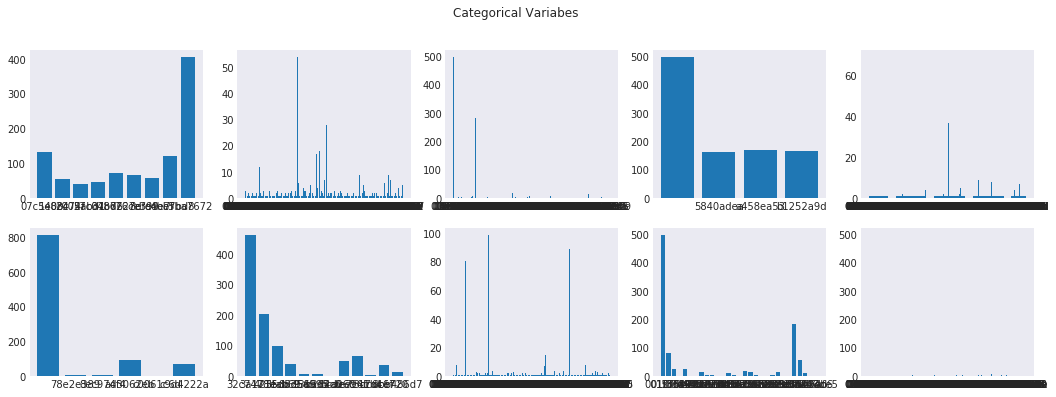

In [39]:
start = time.time()
names = []
values = []

# count variables
for i in range(10):
    lbl, cnts = np.unique(categorical_columns[categorical_column_names[i+16]], return_counts=True)
    data = dict((zip(lbl, cnts)))
    names.append(list(data.keys()))
    values.append(list(data.values()))
#     print(names, values)
    
fig, axs = plt.subplots(2, 5, figsize=(18, 6), sharey=False)

axs[0,0].bar(names[0], values[0])
axs[0,1].bar(names[1], values[1])
axs[0,2].bar(names[2], values[2])
axs[0,3].bar(names[3], values[3])
axs[0,4].bar(names[4], values[4])
axs[1,0].bar(names[5], values[5])
axs[1,1].bar(names[6], values[6])
axs[1,2].bar(names[7], values[7])
axs[1,3].bar(names[8], values[8])
axs[1,4].bar(names[9], values[9])

fig.suptitle('Categorical Variabes')
print(f'... completed job in {time.time() - start} seconds.')

In [40]:
# create column arrays for numerical features

start = time.time()

def map_to_int(string):
    if string == "":
        return np.nan
    else:
        return(int(string))

numeric_column_names = ['n1','n2','n3','n4','n5','n6','n7','n8','n9','n10','n11','n12','n13']
numeric_columns = defaultdict()
for i in range(1,14):
    numeric_columns[numeric_column_names[i-1]] = np.array(sampleTrainRDD.map(lambda x: map_to_int(x[i])).collect())
    
print(f'... completed job in {time.time() - start} seconds.')

... completed job in 1.1974713802337646 seconds.


In [41]:
print(numeric_columns['n13'][:30])

[ 2.  4. 45. nan  0. nan nan  0.  8.  1.  2.  6. nan  5.  4. 20.  2.  1.
  2.  3.  6.  4.  6. 17. nan nan 16.  2. 15. 13.]


... completed job in 1.585407018661499 seconds.


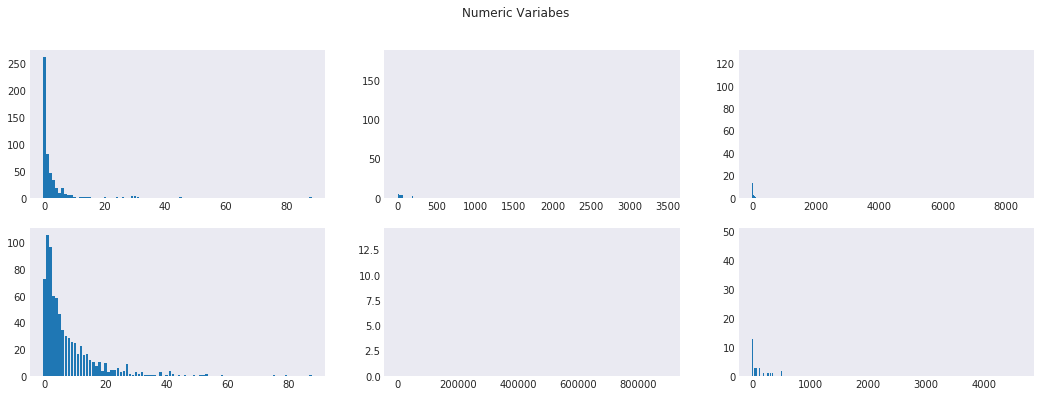

In [42]:
start = time.time()
names = []
values = []

# count variables
for i in range(6):
    lbl, cnts = np.unique(numeric_columns[numeric_column_names[i]], return_counts=True)
    data = dict((zip(lbl, cnts)))
    names.append(list(data.keys()))
    values.append(list(data.values()))
#     print(names, values)
    
fig, axs = plt.subplots(2, 3, figsize=(18, 6), sharey=False)

axs[0,0].bar(names[0], values[0])
axs[0,1].bar(names[1], values[1])
axs[0,2].bar(names[2], values[2])
axs[1,0].bar(names[3], values[3])
axs[1,1].bar(names[4], values[4])
axs[1,2].bar(names[5], values[5])

fig.suptitle('Numeric Variabes')
print(f'... completed job in {time.time() - start} seconds.')

... completed job in 2.055804491043091 seconds.


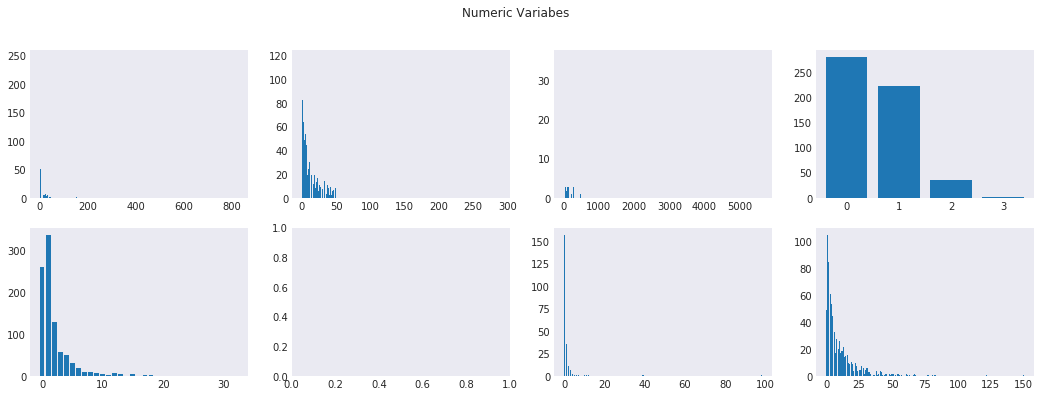

In [43]:
start = time.time()
names = []
values = []

# count variables
for i in range(7):
    lbl, cnts = np.unique(numeric_columns[numeric_column_names[i+6]], return_counts=True)
    data = dict((zip(lbl, cnts)))
    names.append(list(data.keys()))
    values.append(list(data.values()))
#     print(names, values)
    
fig, axs = plt.subplots(2, 4, figsize=(18, 6), sharey=False)

axs[0,0].bar(names[0], values[0])
axs[0,1].bar(names[1], values[1])
axs[0,2].bar(names[2], values[2])
axs[0,3].bar(names[3], values[3])
axs[1,0].bar(names[4], values[4])
axs[1,2].bar(names[5], values[5])
axs[1,3].bar(names[6], values[6])

fig.suptitle('Numeric Variabes')
print(f'... completed job in {time.time() - start} seconds.')